In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf 
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 15,6
import warnings
warnings.filterwarnings ('ignore')

In [2]:
data = pd.read_csv('monthly-beer-production-in-austr.csv')

In [3]:
data.head()

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
data.Month = data['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))

In [5]:
data.Month

0     1956-01-15
1     1956-02-15
2     1956-03-15
3     1956-04-15
4     1956-05-15
         ...    
471   1995-04-15
472   1995-05-15
473   1995-06-15
474   1995-07-15
475   1995-08-15
Name: Month, Length: 476, dtype: datetime64[ns]

In [6]:
data.set_index('Month' , inplace=True)

In [7]:
data.head()

,Monthly beer production in Australia
Month,
1956-01-15,93.2
1956-02-15,96.0
1956-03-15,95.2
1956-04-15,77.1
1956-05-15,70.9


In [8]:
data.columns=['Monthly beer production in Australia']

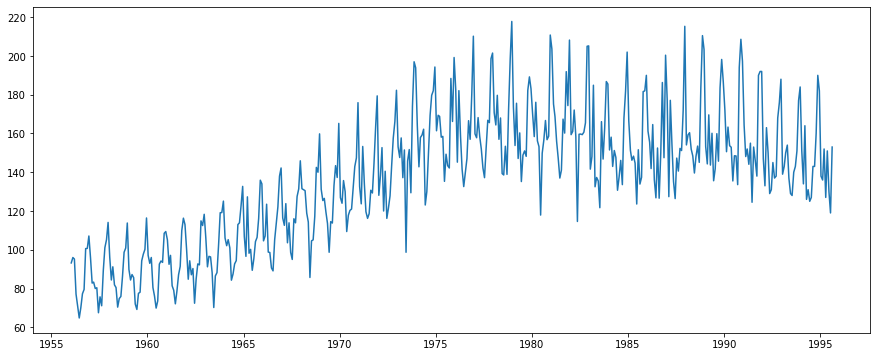

In [9]:
plt.plot(data)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

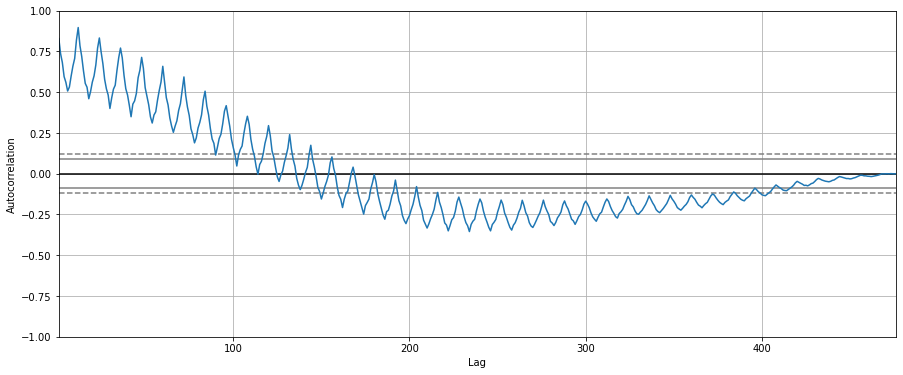

In [10]:
autocorrelation_plot(data)

In [11]:
ts = data

In [12]:
ts['Monthly beer production in Australia']

Month
1956-01-15     93.2
1956-02-15     96.0
1956-03-15     95.2
1956-04-15     77.1
1956-05-15     70.9
              ...  
1995-04-15    127.0
1995-05-15    151.0
1995-06-15    130.0
1995-07-15    119.0
1995-08-15    153.0
Name: Monthly beer production in Australia, Length: 476, dtype: float64

In [13]:
ts_log = np.log(ts)

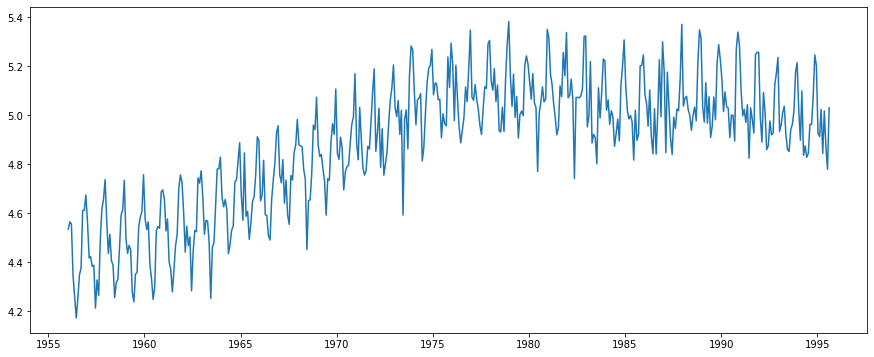

In [15]:
plt.plot(ts_log)

In [16]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window =30, center = False).mean()
    rolstd  = timeseries.rolling(window =30, center = False).std()
    
    orig = plt.plot(timeseries, color= 'blue' , label = 'Original')
    mean = plt.plot(rolmean, color= 'red' , label = 'Rolling Mean')
    std = plt.plot(rolstd, color= 'black' , label = 'Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling mean and Rolling Standard Deviation')
    plt.show(block=False)
    
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='BIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p_value','#lags Used','number of Observation used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
        

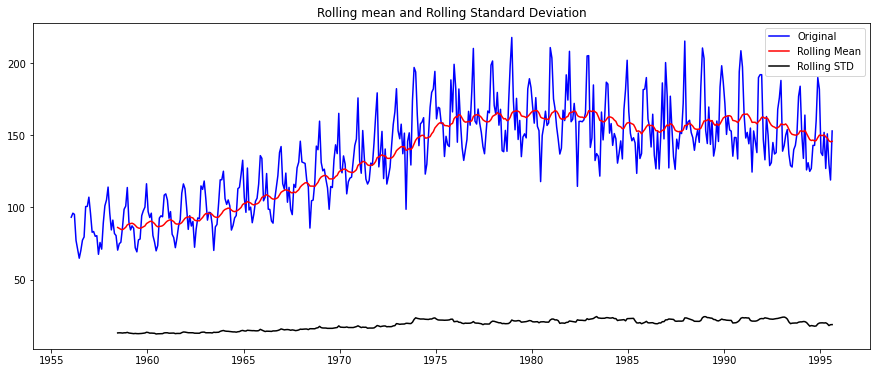

Results of Dickey-Fuller Test:
Test Statistics                -2.379024
p_value                         0.147744
#lags Used                     11.000000
number of Observation used    464.000000
Critical Value (1%)            -3.444522
Critical Value (5%)            -2.867789
Critical Value (10%)           -2.570099
dtype: float64


In [17]:
test_stationarity(ts)

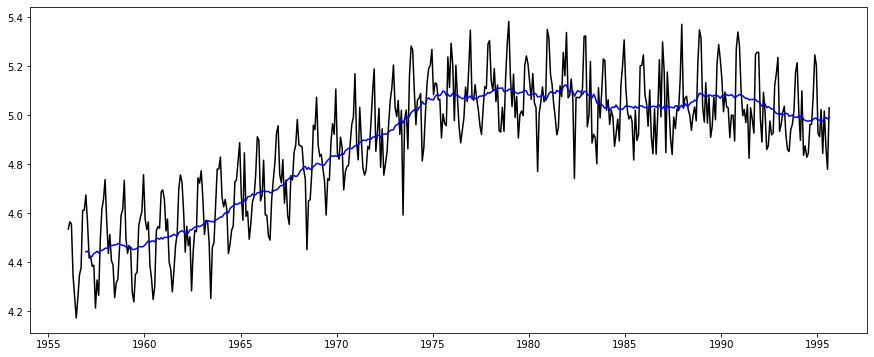

In [18]:
movingAverage = ts_log.rolling(window=12).mean()
movingSTD = ts_log.rolling(window=12).std()
plt.plot(ts_log , color='black')
plt.plot(movingAverage, color='blue')
#plt.plot(movingSTD, color='red')

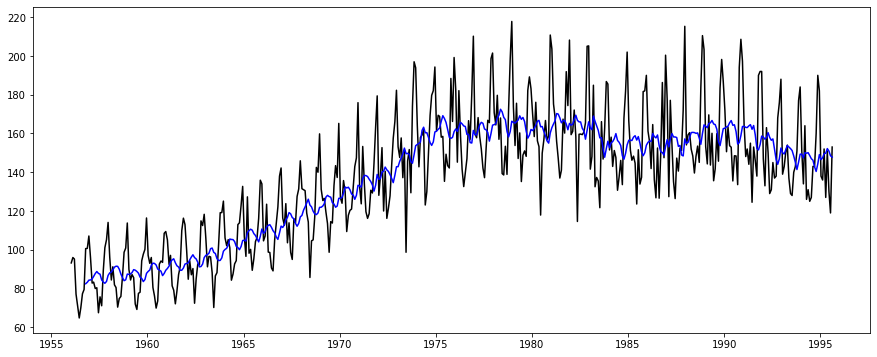

In [25]:
movingAverage_original = ts.rolling(window=10).mean()
movingSTD_original = ts.rolling(window=10).std()
plt.plot(ts, color='black')
plt.plot(movingAverage_original, color='blue')
#plt.plot(movingSTD_original, color='red')

In [26]:
ts_log_mv_diff = ts_log - movingAverage

In [27]:
ts_log_mv_diff.dropna( inplace=True)

In [28]:
ts_Original_mv_diff = ts - movingAverage_original

In [29]:
ts_Original_mv_diff.dropna( inplace=True)

In [30]:
ts_log_mv_diff.head()

,Monthly beer production in Australia
Month,
1956-12-15,0.231830
1957-01-15,0.118994
1957-02-15,-0.015558
1957-03-15,0.001590
1957-04-15,-0.041908


In [31]:
ts_Original_mv_diff.head()

,Monthly beer production in Australia
Month,
1956-10-15,18.13
1956-11-15,17.48
1956-12-15,22.77
1957-01-15,11.50
1957-02-15,-2.17


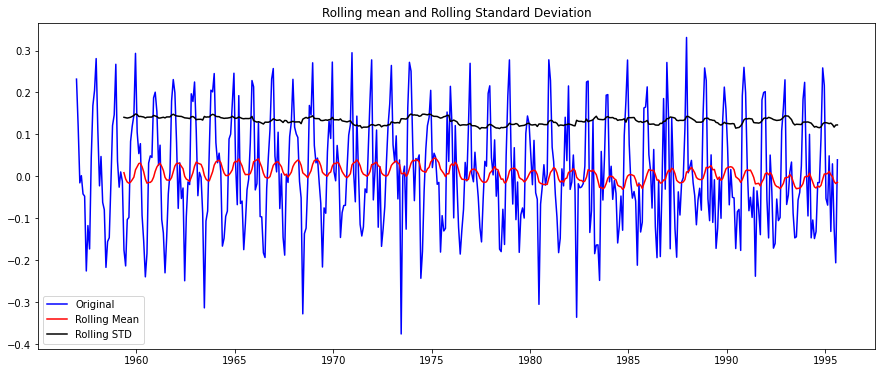

Results of Dickey-Fuller Test:
Test Statistics                -3.432559
p_value                         0.009898
#lags Used                     13.000000
number of Observation used    451.000000
Critical Value (1%)            -3.444933
Critical Value (5%)            -2.867970
Critical Value (10%)           -2.570195
dtype: float64


In [32]:
test_stationarity(ts_log_mv_diff)

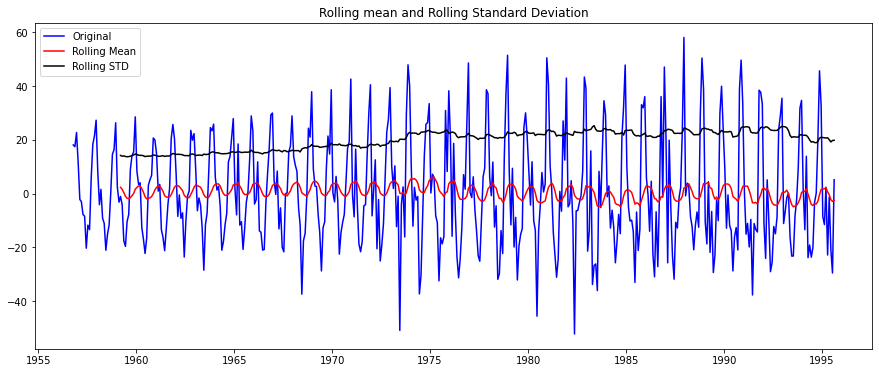

Results of Dickey-Fuller Test:
Test Statistics                -4.020002
p_value                         0.001309
#lags Used                     13.000000
number of Observation used    453.000000
Critical Value (1%)            -3.444868
Critical Value (5%)            -2.867941
Critical Value (10%)           -2.570180
dtype: float64


In [33]:
test_stationarity(ts_Original_mv_diff)